# 업종별 평균 주문 금액 시각화

업종 별 평균 주문 금액의 시각화를 윟

In [24]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [25]:
order = pd.read_csv('./업종별 주문 금액.csv', encoding='utf-8', engine='python')
order.head()

,주문날짜,주문시간,업종,시도,시군구,주문금액
0,2020-01-01,0,돈까스/일식,경기도,고양시 덕양구,49000
1,2020-01-01,0,돈까스/일식,경기도,광명시,36167
2,2020-01-01,0,돈까스/일식,경기도,부천시,47333
3,2020-01-01,0,돈까스/일식,경기도,의정부시,30343
4,2020-01-01,0,돈까스/일식,전라북도,군산시,44000


In [26]:
order = order[['업종','주문금액']]
order = order.drop(index= order[order['업종'] == '심부름'].index)
order = order.drop(index= order[order['업종'] == '배달전문업체'].index)
order.head()

,업종,주문금액
0,돈까스/일식,49000
1,돈까스/일식,36167
2,돈까스/일식,47333
3,돈까스/일식,30343
4,돈까스/일식,44000


In [27]:
price_rate = order.groupby('업종').mean().sort_values(by=['주문금액'], ascending=True)
price_rate

,주문금액
업종,
패스트푸드,20048.952192
카페/디저트,20880.808008
분식,21886.107995
치킨,23962.986639
도시락,24472.495363
피자,24923.202120
중식,25910.242753
한식,26313.791137
아시안/양식,26536.194244


In [46]:
#한글 폰트 사용을 위한 폰트 다운로드
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

([<matplotlib.axis.XTick at 0x196b7f174f0>,
 [Text(0, 0, '패스트푸드'),
  Text(1, 0, '카페/디저트'),
  Text(2, 0, '분식'),
  Text(3, 0, '치킨'),
  Text(4, 0, '도시락'),
  Text(5, 0, '피자'),
  Text(6, 0, '중식'),
  Text(7, 0, '한식'),
  Text(8, 0, '아시안/양식'),
  Text(9, 0, '야식'),
  Text(10, 0, '찜탕'),
  Text(11, 0, '돈까스/일식'),
  Text(12, 0, '족발/보쌈'),
  Text(13, 0, '회')])

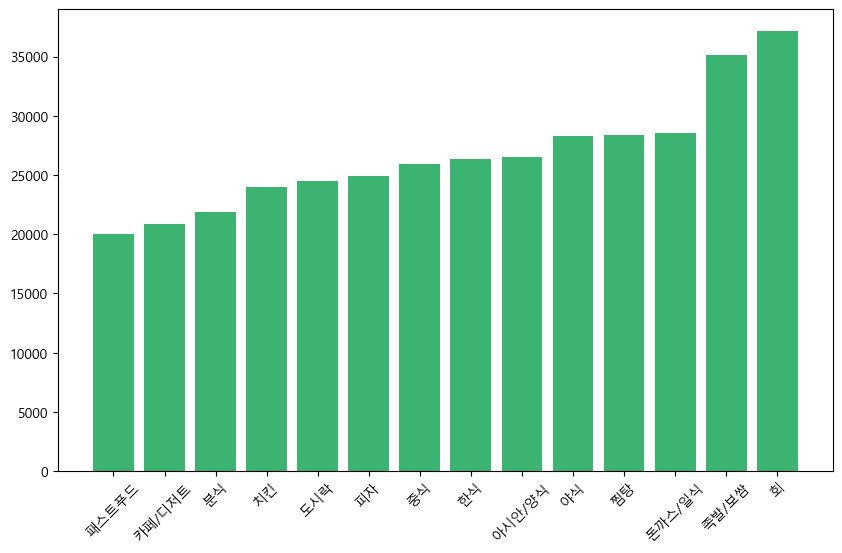

In [48]:
y = price_rate['주문금액'].values.tolist()
x = price_rate.index.tolist()

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot()

index = np.arange(14)

ax1.bar(index, y, color = 'mediumseagreen')
plt.xticks(index, x, rotation=45)